# Dimensionality Reduction and Clustering Techniques

Dimensionality reduction and clustering techniques play essential roles in data science and big data analytics. They help manage the challenges posed by high-dimensional and large datasets, facilitating data exploration, model improvement, pattern discovery, and efficient computation.

## 1. Principal Component Analysis (PCA)
PCA is a technique used to emphasize variation and capture strong patterns in a dataset.

#### Step-by-Step Breakdown:

1. **Standardization** - First, data is standardized by subtracting the mean and dividing by the standard deviation. This ensures that all variables are treated equally.

2. **Covariance Matrix** - Next, the covariance matrix is computed to understand how different variables change together. The covariance between two variables is calculated as:
<h4><center>$ \text{cov}(X,Y) = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{n-1} $</center></h4>
where \(\bar{X}\) and \(\bar{Y}\) are the means of variables X and Y.

3. **Eigendecomposition** - Then, the eigenvalues and eigenvectors of the covariance matrix are computed. Eigenvectors define the directions of the new space, and eigenvalues determine their magnitude.

4. **Principal Components** - 
Finally, the eigenvectors are ordered by the corresponding eigenvalues, and the top ones are chosen. These are the principal components, and they represent the directions of maximum variance.

#### Mathematical Components:
Hopefully now the importance of the mathematical techniques elaborated in previous notebooks becomes clearer:
- ***Covariance Matrix***: By focusing on the covariance between variables, PCA identifies the structure in the data.
- ***Eigendecomposition***: This step finds the principal components, which are the directions of maximum variance. Mathematically, the eigenvectors are the directions that are most spread out, and the eigenvalues tell you how much spread there is in those directions.

#### Importance in Machine Learning / Data Science:
- ***Feature Extraction:*** Feature extraction is the transformation of data into a reduced set of features that contain essential information. PCA identifies the axes (principal components) that explain the most variance in the data. The extracted features are linear combinations of the original variables and are orthogonal to each other. It is useful when variables are correlated, as it synthesizes them into independent components. 
- ***Dimensionality Reduction:*** Dimensionality reduction aims to represent data in a lower-dimensional space without losing significant information. PCA selects the top principal components that account for the most variance. It reduces dimensions while maintaining the data structure as much as possible. It's effective in compressing data and reducing noise.
- ***Clustering:*** Clustering is the grouping of similar items together. By reducing dimensions, PCA can simplify the clustering task. The principal components might reveal natural clusters within the data and is oten used as a preprocessing step before clustering to make algorithms like k-means more effective.

***Application:*** We'll implement PCA on a simple dataset to understand the reduction of dimensions.

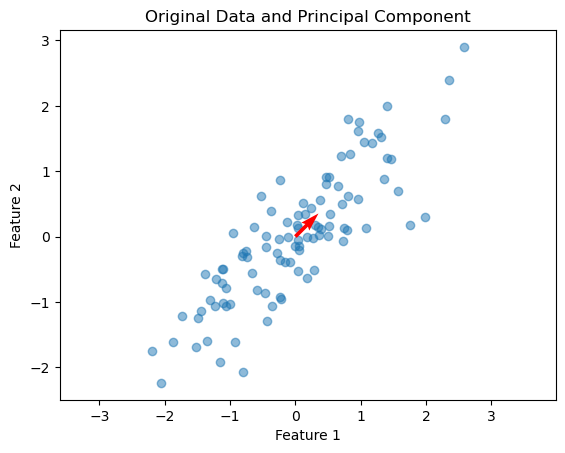

Synthesized Data -  [[-0.28313398 -0.24806521]
 [ 0.30194737  0.16944378]
 [ 2.57515228  2.9013767 ]
 [ 0.47281441  0.9043665 ]
 [ 0.05438233 -0.15124686]]
Prinicpal Component -  [[0.70710678 0.70710678]]
Transformed Data -  [[-0.37561455]
 [ 0.33332388]
 [ 3.87249078]
 [ 0.97381396]
 [-0.06849357]]


In [5]:
# Importing necessary libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Generating a synthetic dataset with 2 main directions of variation
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T

# Standardizing the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Applying PCA to reduce the dimensions to 1
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_standardized)

# Plotting the original data and the direction of maximum variance
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], alpha=0.5)
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=2, color='r')
plt.title('Original Data and Principal Component')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

# Returning the original data, principal component, and transformed data
print('Synthesized Data - ', X_standardized[:5])
print('Prinicpal Component - ', pca.components_)
print('Transformed Data - ', X_pca[:5])

***Analysis of PCA using simple synthetic dataset:***
- The scatter plot above shows the original standardized data (in blue) along with the principal component (red arrow), representing the direction of maximum variance.
- **Original Data** - The standardized data points represent the features of our synthetic dataset.
- **Principal Component** - The principal component is a unit vector that captures the direction of maximum variance.
- **Transformed Data** - By projecting the data onto this principal component, we've reduced the data into a one-dimensional form, retaining the essential information. 

***Real World Applications:*** In the context of images, this reduction would correspond to capturing the main aspects like brightness and contrast while discarding noise. For example, in facial recognition, it could help identify facial features while ignoring irrelevant background details.

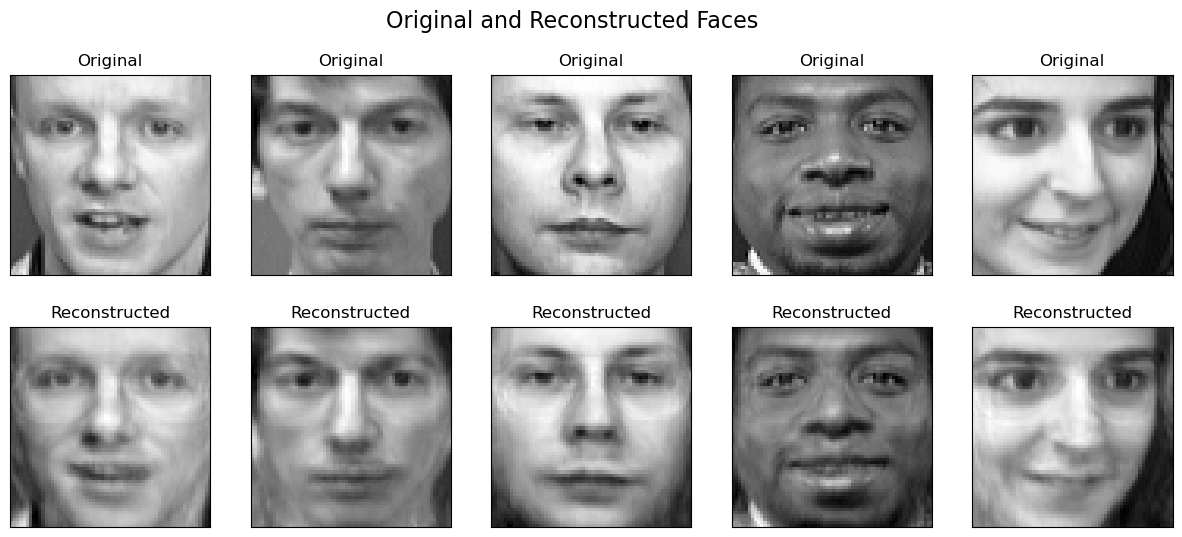

In [8]:
# Importing necessary libraries
from sklearn.datasets import fetch_olivetti_faces

# Loading the Olivetti faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_images = faces_data.images
faces_X = faces_data.data

# Applying PCA to reduce dimensions to 100 components
n_components = 100
pca_faces = PCA(n_components=n_components, whiten=True)
faces_X_pca = pca_faces.fit_transform(faces_X)

# Reconstructing the images from the transformed data
faces_X_reconstructed = pca_faces.inverse_transform(faces_X_pca)

# Reshaping the reconstructed data to visualize as images
faces_images_reconstructed = faces_X_reconstructed.reshape(faces_images.shape)

# Plotting original and reconstructed images for comparison
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks':[], 'yticks':[]})
fig.suptitle('Original and Reconstructed Faces', size=16)

# Original faces
for i, ax in enumerate(axes[0]):
    ax.imshow(faces_images[i], cmap='gray')
    ax.set_title('Original')

# Reconstructed faces
for i, ax in enumerate(axes[1]):
    ax.imshow(faces_images_reconstructed[i], cmap='gray')
    ax.set_title('Reconstructed')

plt.show()


***Analysis of PCA using facial analysis:***
- **Important Features** - Here we can see that tthe principal components correspond to the main variations among the faces, such as brightness, contrast, and major facial features like eyes, nose, and mouth.
- **Noise** - Background details, noise, or other minor variations are discarded, allowing us to focus on the key features of the face.

## 2. Non-Negative Matrix Factorization (NMF)
NMF is a technique that decomposes a non-negative matrix into the product of two lower-dimensional matrices.

#### Step-by-Step Breakdown:

1. **Non-Negativity** - Unlike PCA, NMF requires the data to be non-negative. This constraint often aligns with the intuitive understanding of the data.

2. **Factorization** - Given a matrix $\mathbf{V}$, NMF aims to find two matrices $\mathbf{W}$ and $\mathbf{H}$ such that:
<h4><center>$\mathbf{V} \approx \mathbf{W} \mathbf{H} $</center></h4>
Where $\mathbf{W}$ contains the basis vectors, and $\mathbf{H}$ contains the encoding coefficients. Each column of 
$\mathbf{V}$ can be approximately reconstructed by a linear combination of the columns of $\mathbf{W}$, with the corresponding coefficients in $\mathbf{H}$. Both $\mathbf{W}$ and $\mathbf{H}$ are non-negative and often represent meaningful patterns in the data.

3. **Optimization** - An iterative process is typically employed, where 
$\mathbf{W}$ and $\mathbf{H}$ are initialized randomly and then updated in a way that decreases the divergence. Various algorithms, such as multiplicative update rules or gradient descent, can be used for these updates. During each iteration, $\mathbf{W}$ and $\mathbf{H}$ are updated, decreasing the divergence until a local minimum is reached or until further iterations do not significantly reduce the divergence. This is achieved by optimizing the following objective function:
<h4><center>$
\min_{W,H} \frac{1}{2} \| V - WH \|_F^2
$</center></h4>
subject to \( W \geq 0 \), \( H \geq 0 \).

    - *A more in-depth explanation on Optimization is avaliable in the Optimization Methods folder*

#### Mathematical Components:
Hopefully now the importance of the mathematical techniques elaborated in previous notebooks becomes clearer:
- ***Non-Negativity Constraint*** This constraint ensures that the decomposition is often more interpretable, as negative values in many contexts (e.g., word counts, image brightness) don't make sense.
- ***Matrix Factorization*** Mathematically, the factorization into $\mathbf{W}$ and $\mathbf{H}$ captures underlying structures and patterns in the data.

#### Importance in Machine Learning / Data Science:
- ***Feature Extraction:*** NMF decomposes the data into two matrices, representing parts and coefficients. It's features are non-negative, often making them more interpretable, particularly useful for compositional data where negative values don't make sense.
- ***Dimensionality Reduction:*** NMF factorizes the matrix into two lower-dimensional matrices. It reduces dimensions in a way that respects the non-negativity of the original data, particularly useful in contexts where the components have a meaningful physical interpretation (e.g., image processing).
- ***Clustering:*** In this case the factorization can be interpreted as assigning data points to clusters based on the parts representation. It facilitates clustering by expressing data as combinations of basic components and is particularly effective for clustering non-negative data like text documents.

In [7]:
# Importing necessary libraries for NMF
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents representing a collection of text
documents = [
    "apple banana fruit",
    "banana orange fruit",
    "apple orange apple",
    "dog cat animal",
    "cat elephant animal",
    "dog elephant dog"
]

# Transforming documents into a term-document matrix using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(documents)

# Applying NMF to extract 2 topics
nmf = NMF(n_components=2, random_state=42)
W = nmf.fit_transform(X_tfidf)
H = nmf.components_

# Terms associated with each topic
terms = vectorizer.get_feature_names_out()
topics = [[terms[i] for i in H[j].argsort()[-3:][::-1]] for j in range(2)]

# Returning the "loading" of each topic in the documents (W) and the terms associated with each topic (topics)
print('Matrix W - ', W)
print('Topics - ', topics)

Matrix W -  [[0.         0.69417143]
 [0.         0.61147836]
 [0.         0.52719451]
 [0.55953233 0.        ]
 [0.49290053 0.        ]
 [0.4249027  0.        ]]
Topics -  [['dog', 'cat', 'animal'], ['apple', 'fruit', 'banana']]


***Analysis of NMF for Text***
We applied NMF to a collection of documents and extracted 2 topics. The terms associated with these topics are:
- **Topic 1**: 'apple', 'fruit', 'banana' (related to fruits)
- **Topic 2**: 'dog', 'cat', 'animal' (related to animals)

The results above confirm this. In a real-world scenario, where you have a large set of documents, NMF can be used to uncover underlying topics or themes. This is extremely useful in text mining, recommendation systems, and exploratory data analysis. For example, news agencies can categorize articles into different subjects, or online retailers can group products into related categories.
- For an example of these applications being used on a larger dataset visit my real 

##### Similarities and Differences between PCA and NMF:
Both PCA and NMF transform data into new feature spaces for extraction, reduce dimensions without losing significant information, and can enhance clustering. However, they differ in their core principles and applications. PCA's emphasis on orthogonal features that capture maximum variance contrasts with NMF's focus on non-negative and often more context-relevant representations. While PCA synthesizes correlated variables into independent components, NMF’s non-negative features usually offer more interpretability. These differences lend themselves to different contexts and data types, making the choice between PCA and NMF dependent on the specific requirements of the task at hand; as seen in the examples above.

## 3. Relevance to Data Scientist 

Below is a summary of how these techniques are relevant to real world-applications; and why they're utilized by Data Scientist.

**Importance of Dimensionality Reduction in Machine Learning / Data Science:**
1. **Curse of Dimensionality:** High-dimensional data can lead to sparsity, increased computational complexity, and overfitting. Dimensionality reduction mitigates these issues by transforming data into a lower-dimensional space.

2. **Visualization:** High-dimensional data is difficult to visualize. Dimensionality reduction techniques project data into lower dimensions, enabling effective visualization and interpretation.

3. **Noise Reduction:** By focusing on the most important dimensions, dimensionality reduction can help filter out noise and highlight meaningful patterns.

4. **Improved Model Performance:** Dimensionality reduction reduces the risk of overfitting, leading to more generalized and accurate models.

5. **Feature Engineering:** In machine learning, reducing the number of features can lead to faster training times and simpler models.

**Importance of Clustering Techniques in Machine Learning / Data Science:**
1. **Data Exploration:** Clustering helps discover inherent patterns, structures, and groups within the data, revealing insights that might not be apparent through manual inspection.

2. **Anomaly Detection:** Clustering can identify outliers or anomalies that deviate from the typical patterns, assisting in fraud detection, fault detection, and quality control.

3. **Data Summarization:** Clustering provides a way to summarize large datasets by grouping similar data points, making it easier to understand and work with the data.

4. **Customer Segmentation:** Clustering assists businesses in segmenting customers based on behaviors, preferences, and characteristics for targeted marketing and personalization.

5. **Feature Engineering:** Clustering can generate new features by assigning data points to clusters, which can then be used as inputs in machine learning models.